In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import load_config, tabulacion, apply_format
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

In [2]:
CURRENT=os.getcwd()
ROOT=os.path.dirname(CURRENT)

In [3]:
config_f=load_config("config.yaml")

In [4]:
datos=pd.read_csv(os.path.join(ROOT,config_f["data"]["main"]))
genres=pd.read_csv(os.path.join(ROOT,config_f["data"]["cat_genres"]))
themes=pd.read_csv(os.path.join(ROOT,config_f["data"]["cat_themes"]))

In [5]:
datos_display=datos[['ranking', 'score', 'title', 'studio', 'themes', 'genres',
       'demographics', 'number_episodes', 'members','year']]\
    .assign(
        themes = lambda df_: df_.themes\
            .str.replace("_"," ", regex=True)\
            .str.replace("\[","", regex=True)\
            .str.replace("\]","", regex=True)\
            .str.replace("\'","", regex=True),
        genres = lambda df_: df_.genres\
            .str.replace("_"," ", regex=True)\
            .str.replace("\[","", regex=True)\
            .str.replace("\]","", regex=True)\
            .str.replace("\'","", regex=True),
        studio = lambda df_:df_.studio\
            .str.replace("_"," ", regex=True)\
            .str.capitalize()
    )

### The top:

- Top Animes con mejor calificación promedio:

In [6]:
top_10_animes=apply_format(datos_display.head(10))
columnas_top1=['ranking', 'Score promedio ', 'Título', 'Estudio', 'Temática', 'Público objetivo']
tabulacion(top_10_animes, columnas_top1, top_margin=10, bottom_margin=10, left_margin=50, right_margin=50, w=600, h=445)

- Top animes populares

In [7]:
most_popular_anime=apply_format(datos_display\
                                .sort_values(by="members", ascending=False).head(10))
columnas_toppop=['ranking', 'Score promedio ', 'Título', 'Estudio', 'Temática', 'Público objetivo', 'Popularidad']
tabulacion(most_popular_anime, columnas_toppop, top_margin=10, bottom_margin=10, left_margin=50, right_margin=50, w=650, h=430)

- Top animes mas largos

In [8]:
top_longest_animes=apply_format(datos_display.sort_values(by="number_episodes",ascending= False)\
            .head(10))
columnas_topL=['ranking', 'Score promedio ', 'Título', 'Episodios','Año']
tabulacion(top_longest_animes, columnas_topL, top_margin=10, bottom_margin=10, left_margin=50, right_margin=50, w=600, h=220)

- Most popular studio

In [9]:
datos_display.columns

Index(['ranking', 'score', 'title', 'studio', 'themes', 'genres',
       'demographics', 'number_episodes', 'members', 'year'],
      dtype='object')

In [10]:
top_10_popular_studios=\
    datos[['studio','members', 'score']]\
    .groupby('studio')\
    .mean()\
    .sort_values(by="members", ascending=False)\
    .head(10)
top_10_popular_studios

,members,score
studio,,
studio_bind,536163.750000,8.182500
white_fox,410588.951220,7.278049
wit_studio,366050.904762,7.284603
bones,321106.436620,7.336479
aic_build,297174.555556,7.007778
mappa,296174.169231,7.215692
cloverworks,290328.324324,7.136216
david_production,270820.581395,7.312093
a_1_pictures,254106.824074,7.128287


In [11]:
# Definir los datos
studios = top_10_popular_studios.index.tolist()
members = top_10_popular_studios['members'].tolist()
scores = top_10_popular_studios['score'].tolist()

# Crear una traza para los miembros
trace1 = go.Bar(x=studios, y=members, name='Miembros', marker=dict(color='rgba(55, 83, 109, 0.7)'))

# Crear una traza para los puntajes, que estarán en el eje secundario
trace2 = go.Scatter(x=studios, y=scores, name='Score', mode='markers+text', yaxis='y2', textposition='top center', text=[str(round(i, 2)) for i in scores])

# Crear un layout, note la 'yaxis2' para la segunda traza
layout = go.Layout(
    title='Estudios más populares',
    yaxis=dict(
        title='Miembros',
        titlefont=dict(color='rgba(55, 83, 109, 0.7)'),
        tickfont=dict(color='rgba(55, 83, 109, 0.7)')
    ),
    yaxis2=dict(
        title='Score',
        overlaying='y',
        side='right',
        showgrid=False,
        titlefont=dict(color='rgba(245, 39, 39, 0.8)'),
        tickfont=dict(color='rgba(245, 39, 39, 0.8)'),
        range=[0,10]
    ),
    legend=dict(
        x=0.5,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)




fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.update_layout(
        autosize=False,
        width=700,
        height=500,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=5
        )
    )
    
fig.show()

In [12]:
top_10_popular_studios

,members,score
studio,,
studio_bind,536163.750000,8.182500
white_fox,410588.951220,7.278049
wit_studio,366050.904762,7.284603
bones,321106.436620,7.336479
aic_build,297174.555556,7.007778
mappa,296174.169231,7.215692
cloverworks,290328.324324,7.136216
david_production,270820.581395,7.312093
a_1_pictures,254106.824074,7.128287


- Studio with the greatest number of episodes

In [13]:
top_10_more_episodes_studios = (
    datos[['studio','number_episodes','score']]
    .groupby('studio')
    .agg({
        'number_episodes': 'sum',
        'score': 'mean'
    })
    .sort_values(by="number_episodes", ascending=False)
    .head(11)
)
#top_studios_list = top_10_popular_studios.index.tolist()
#animes_from_top_studios = datos[datos['studio'].isin(top_studios_list)]

In [14]:
top_10_more_episodes_studios

,number_episodes,score
studio,,
add_some,23186.0,5.543054
toei_animation,12402.0,6.640861
sunrise,7632.0,6.847976
shin_ei_animation,5571.0,6.748187
pierrot,5486.0,6.806574
eiken,4999.0,6.333750
nippon_animation,4859.0,6.791871
olm,4773.0,6.619658
madhouse,4505.0,6.926792


- Top 10 popular demographics

In [15]:
top10_popular_demografics=datos[['demographics','members','score']]\
    .groupby("demographics")\
    .mean()\
    .sort_values(by="members", ascending = False)
top10_popular_demografics

,members,score
demographics,,
shounen,157614.111372,7.072462
seinen,113517.884754,6.961465
josei,77832.281250,6.981146
shoujo,64228.350604,6.782832
not_available,56241.479112,6.351472
kids,9063.181200,6.112072
"kids,_shounen",6868.557692,6.894423
"kids,_shoujo",2475.200000,6.556400


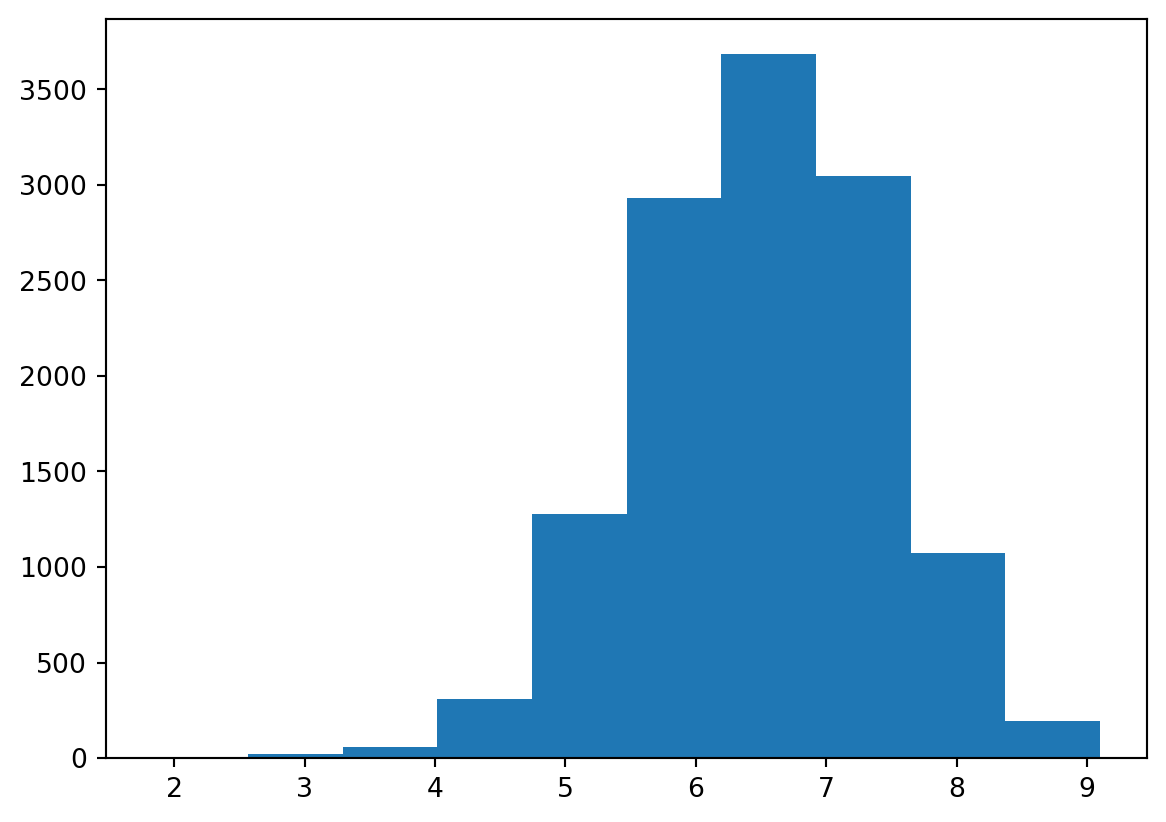

In [16]:
plt.hist(datos_display["score"]);